In [1]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
from utils.json import read_from_json
from utils.nnsetup import *
from utils.attackperformance import *
from attacks.attacks import Attack

np.random.seed(1)

In [2]:
X_train, Y_train, Y_train_e, X_test, Y_test = get_datasets()

In [3]:
cls = getNN("nets/main_nn_300")

In [20]:
cls_DP_5 = getNN("nets/main_nn_300_DP_1_5")
cls_DP_2 = getNN("nets/main_nn_300_DP_2_2")

In [21]:
X_test_c = X_test[:300].copy()
Y_test_c = Y_test[:300].copy()

In [22]:
test_epsilon = [1/255]
#test_epsilon = [1/255, 3/255, 5/255, 10/255, 15/255, 30/255, 50/255, 80/255, 120/255]

In [29]:
df, insights = get_insights(cls, test_epsilon, X_test_c, Y_test_c)
df

epsilon = 0.00392156862745098
100 instances, 100 adversaries
200 instances, 200 adversaries
300 instances, 300 adversaries
------------------------------
total time: 9.445740699768066
total iter: 5694


,target,successful attempts,epsilon
0,NaN,300.0,0.003922


In [30]:
insights.head()

,original,prediction,iterations,epsilon,L2 norm
0,7.0,3.0,20.0,0.003922,1.647185
1,3.0,5.0,30.0,0.003922,2.385987
2,9.0,4.0,3.0,0.003922,0.245372
3,8.0,2.0,12.0,0.003922,1.027092
4,6.0,2.0,17.0,0.003922,1.482369


In [31]:
df_dist, insights_dist = get_insights(cls_DP_2, test_epsilon, X_test_c, Y_test_c)
df_dist

epsilon = 0.00392156862745098
100 instances, 100 adversaries
200 instances, 200 adversaries
300 instances, 300 adversaries
------------------------------
total time: 9.470157384872437
total iter: 5731


,target,successful attempts,epsilon
0,NaN,300.0,0.003922


In [32]:
insights_dist.head()

,original,prediction,iterations,epsilon,L2 norm
0,7.0,9.0,25.0,0.003922,1.981184
1,3.0,5.0,36.0,0.003922,2.768639
2,9.0,4.0,2.0,0.003922,0.163629
3,8.0,2.0,12.0,0.003922,1.034425
4,6.0,2.0,18.0,0.003922,1.559937


In [33]:
n_iter = max(max(insights['iterations']), max(insights_dist['iterations']))
iterations = np.arange(n_iter)
n_iter

65.0

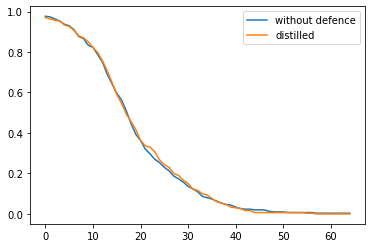

In [34]:


accuracy = []
accuracy_dist = []
for i in iterations:
  accuracy.append(1 - sum(insights['iterations']<=i)/Y_test_c.shape[0])
  accuracy_dist.append(1 - sum(insights_dist['iterations']<=i)/Y_test_c.shape[0])
  
plt.plot(iterations, accuracy, label='without defence')
plt.plot(iterations, accuracy_dist, label='distilled')
#plt.savefig('images/accuracy_T_10.png')
plt.legend()
plt.show()

In [29]:
plt.savefig('images/accuracy_T_10.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracy = []
# accuracy_dist = []
# for e in epsilons:
#   accuracy.append(1 - sum(insights['epsilon']==e)/Y_test_c.shape[0])
#   accuracy_dist.append(1 - sum(insights_dist['epsilon']==e)/Y_test_c.shape[0])
  
plt.plot(test_epsilon, 1 - df['successful attempts']/300, label='without defence')
plt.plot(test_epsilon, 1 - df_dist['successful attempts']/300, label='distilled')
plt.legend()
plt.show()

Something wrong. Probably algorithm stop condition is uncorrect. Also will be nice to extract samples with initially incorrect classification.

In [ ]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [ ]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

In [ ]:
# pretrub_by_iter = non_targeted.groupby('iterations', as_index=False)['L2 norm'].mean()
# pretrub_by_iter = pretrub_by_iter.sort_values("iterations")

# plt.plot(pretrub_by_iter['iterations'], pretrub_by_iter['L2 norm'])

In [ ]:
# accuracy_t = []
# for iter in pretrub_by_iter["iterations"].values:
#     accuracy_t.append(1 - non_targeted[non_targeted["iterations"]<=iter].shape[0]/total_attempts)
    
# iterations_t = pretrub_by_iter["iterations"].values

In [ ]:
# FGSM_t, = plt.plot(iterations_t, accuracy_t, 'g-', label='TFGSM')

In [ ]:
import keras